In [1]:
library("DESeq2")
library("stringr")
library("dplyr")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

# Reading in data

In [2]:
cts <- as.matrix(read.table("oly_Trinityv2.txt",header = T,row.names=1))
head(cts)

,CAA1T1_5C,ORA1T1_1M,CAB1T1_14C,CAA1T1_6M,CAA1T1_6C,CAB1T1_13C,BCA1T1_10C,BCB1T1A_16C,BCB1T1_16M,BCA1T1_9C,⋯,ORA1T1_4M,ORA3T1_54C,ORA3T1_54M,ORA3T1_56C,ORB3T1_69C,ORB3T1_71C,ORA1T2_97M,ORA1T2_98C,ORA1T2_98M,ORA1T2_99C
TRINITY_DN0_c0_g1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TRINITY_DN100001_c0_g1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TRINITY_DN100002_c0_g1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TRINITY_DN100005_c0_g1,0,0,0,0,0,0,0,4,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TRINITY_DN100008_c0_g1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TRINITY_DN100009_c0_g1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
batch <- c(rep(24,14),rep(318,66))
treatment <- substr(colnames(cts), 3, 3)
time_point <- substr(colnames(cts), 5, 6) 
population <- substr(colnames(cts), 1, 2)
tissue <- str_sub(colnames(cts),-1,-1)
conditions <- as.data.frame(cbind(time_point,treatment,population, tissue,batch))
head(conditions)
write.table(conditions, "oly_201803_conditions.txt",quote = F, sep = "\t",row.names = F, col.names = T)

time_point,treatment,population,tissue,batch
T1,A,CA,C,24
T1,A,OR,M,24
T1,B,CA,C,24
T1,A,CA,M,24
T1,A,CA,C,24
T1,B,CA,C,24


In [41]:
colnames(C)

[1] "CAA1T1_5C"    "CAB1T1_14C"   "CAA1T1_6C"    "CAB1T1_13C"   "BCA1T1_10C"  
 [6] "BCB1T1A_16C"  "BCA1T1_9C"    "ORA1T1_1C"    "BCA1T2_101C"  "BCA1T2_102C" 
[11] "BCA3T2_125C"  "BCA3T2_126C"  "BCB1T2_139C"  "BCB1T1B_16C"  "BCB3T2_170C" 
[16] "BCB3T2_171C"  "BCB1T1_17C"   "BCA2T1_35C"   "BCB2T1_41C"   "BCA3T1_57C"  
[21] "BCA3T1_59C"   "BCB3T1_62C"   "BCB3T1_63C"   "CAA1T2_105C"  "CAA1T2_106C" 
[26] "CAA2T2_111C"  "CAA3T2_119C"  "CAB1T2_143C"  "CAB1T2_145C"  "CAB2T2_153C" 
[31] "CAB3T2_166C"  "CAB3T2_168C"  "CAA2T1_29C"   "CAB2T1_45C"   "CAA3T1_51C"  
[36] "CAA3T1_52C"   "CAB3T1_65C"   "CAB3T1_67C"   "ORA3T2_124C"  "ORB1T2_147C" 
[41] "ORB1T2_148C"  "ORB3T2B_163C" "ORB3T2A_163C" "ORB3T2_164C"  "ORB1T1_21C"  
[46] "ORA2T1_28C"   "ORB2T1_37C"   "ORA1T1_4C"    "ORA3T1_54C"   "ORA3T1_56C"  
[51] "ORB3T1_69C"   "ORB3T1_71C"   "ORA1T2_98C"   "ORA1T2_99C"

# Ctenidia
## Ctenidia with population:treatment interactions

In [4]:
C <- cts[,grep("C$",colnames(cts))]
C.con <- filter(conditions,tissue == "C")
dim(C)
dim(C.con)

[1] 174644     54

[1] 54  5

In [5]:
C.12 <- DESeqDataSetFromMatrix(countData = C, colData = C.con, design = ~ batch+ time_point + population + treatment + population:treatment)
C.12

class: DESeqDataSet 
dim: 174644 54 
metadata(1): version
assays(1): counts
rownames(174644): TRINITY_DN0_c0_g1 TRINITY_DN100001_c0_g1 ...
  TRINITY_DN99999_c0_g1 TRINITY_DN99_c0_g1
rowData names(0):
colnames(54): CAA1T1_5C CAB1T1_14C ... ORA1T2_98C ORA1T2_99C
colData names(5): time_point treatment population tissue batch

In [6]:
#remove genes with fewer than 12 mapped reads
keep <- rowSums(counts(C.12)) >= 12
C.12 <- C.12[keep,]
dim(C.12)
remove(keep)

[1] 107664     54

In [7]:
#group replicates together
reps <- c(seq(1,14,1),6,seq(16,42,1),42,seq(44,54,1))
C.12 <- collapseReplicates(C.12,groupby = reps,renameCols = F)

In [8]:
#run DEseq2, can take over 5 minutes
C.12 <- DESeq(C.12)
resultsNames(C.12)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
1 rows did not converge in beta, labelled in mcols(object)$betaConv. Use larger maxit argument with nbinomWaldTest


[1] "Intercept"               "batch_318_vs_24"        
[3] "time_point_T2_vs_T1"     "population_CA_vs_BC"    
[5] "population_OR_vs_BC"     "treatment_B_vs_A"       
[7] "populationCA.treatmentB" "populationOR.treatmentB"

### Genes that are different among populationss at the control pH

In [9]:
#Change in OR vs CA at control salinity
OR_CA <- results(C.12, contrast = c("population","OR","CA"))
summary(OR_CA)
sum(OR_CA$padj < 0.1, na.rm=TRUE)
sig_ORCA <- OR_CA[which(OR_CA$padj < 0.1 & !is.na(OR_CA$padj)),]


out of 107664 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 641, 0.6% 
LFC < 0 (down)   : 1086, 1% 
outliers [1]     : 528, 0.49% 
low counts [2]   : 54081, 50% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] 1727

In [56]:
#write file with significant genes
genes.in <- cbind(rep("OR_CA_C_T12",nrow(sig_ORCA)),rownames(sig_ORCA))
write.table(genes.in, "OR_CA_C_T12.genes",sep = "\t",quote = F,na = "NA",row.names = F,col.names = F)

In [10]:
#Change in OR vs BC at control salinity
OR_BC <- results(C.12, contrast = c("population","OR","BC"))
summary(OR_BC)
sum(OR_BC$padj < 0.1, na.rm=TRUE)
sig_ORBC <- OR_BC[which(OR_BC$padj < 0.1 & !is.na(OR_BC$padj)),]
#sig <- sig[which(abs(sig$log2FoldChange) > 1),]


out of 107664 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 426, 0.4% 
LFC < 0 (down)   : 602, 0.56% 
outliers [1]     : 528, 0.49% 
low counts [2]   : 56156, 52% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] 1028

In [57]:
genes.in <- cbind(rep("OR_BC_C_T12",nrow(sig_ORBC)),rownames(sig_ORBC))
write.table(genes.in, "OR_BC_C_T12.genes",sep = "\t",quote = F,na = "NA",row.names = F,col.names = F)

In [11]:
#Change in BC vs CA at control salinity
BC_CA <- results(C.12, contrast = c("population","BC","CA"))
summary(BC_CA)
sum(BC_CA$padj < 0.1, na.rm=TRUE)
sig_BCCA <- BC_CA[which(BC_CA$padj < 0.1 & !is.na(BC_CA$padj)),]
#sig <- sig[which(abs(sig$log2FoldChange) > 1),]


out of 107664 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 582, 0.54% 
LFC < 0 (down)   : 473, 0.44% 
outliers [1]     : 528, 0.49% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] 1055

In [58]:
genes.in <- cbind(rep("BC_CA_C_T12",nrow(sig_BCCA)),rownames(sig_BCCA))
write.table(genes.in, "BC_CA_C_T12.genes",sep = "\t",quote = F,na = "NA",row.names = F,col.names = F)

### Genes with a significant Treatment:population interaction (locally adapted?)
Use Likelihood ratio test to identify genes who's expression is better fite by a model that includes a population:treatment interaction

#### Likelihood ratio test for pop:treatment interaction

In [12]:
lrt.C <- DESeq(C.12, test="LRT",reduced = ~batch+ time_point + population + treatment)

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
1 rows did not converge in beta, labelled in mcols(object)$fullBetaConv. Use larger maxit argument with nbinomLRT


In [76]:
save(lrt.C,file = "lrt_C_12.deseq2")

In [13]:
lrt_R <- results(lrt.C, contrast= c("treatment","B","A"))
summary(lrt_R)
sum(lrt_R$padj < 0.05, na.rm=TRUE)
sig_lrt <- lrt_R[which(lrt_R$padj < 0.05 & !is.na(lrt_R$padj)),]
dim(sig_lrt)


out of 107664 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 971, 0.9% 
LFC < 0 (down)   : 3461, 3.2% 
outliers [1]     : 528, 0.49% 
low counts [2]   : 64409, 60% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] 930

[1] 930   6

In [48]:
genes.in <- cbind(rep("lrt_interactions_C_T12_lf",nrow(sig_lrt)),rownames(sig_lrt))
write.table(genes.in, "lrt_interactions_C_T12_lf.genes",sep = "\t",quote = F,na = "NA",row.names = F,col.names = F)

#### Visualization

In [14]:
#Order of samples by treatment, then population (might be better way to automate this using conditions?)
order_treat <- c('BCA1T1_10C','BCA1T1_9C','BCA1T2_101C','BCA1T2_102C','BCA3T2_125C','BCA3T2_126C','BCA2T1_35C','BCA3T1_57C','BCA3T1_59C',
'ORA1T1_1C','ORA3T2_124C','ORA2T1_28C','ORA1T1_4C','ORA3T1_54C','ORA3T1_56C','ORA1T2_98C','ORA1T2_99C','CAA1T1_5C','CAA1T1_6C','CAA1T2_105C','CAA1T2_106C','CAA2T2_111C','CAA3T2_119C','CAA2T1_29C','CAA3T1_51C','CAA3T1_52C',
'BCB1T2_139C','BCB1T1B_16C','BCB3T2_171C','BCB1T1_17C','BCB2T1_41C','BCB3T1_62C','BCB3T1_63C','BCB1T1A_16C',
'ORB1T2_147C','ORB1T2_148C','ORB3T2B_163C','ORB3T2_164C','ORB1T1_21C','ORB2T1_37C','ORB3T1_69C','ORB3T1_71C',
'CAB1T1_13C','CAB1T1_14C','CAB1T2_143C','CAB1T2_145C','CAB2T2_153C','CAB3T2_166C','CAB3T2_168C','CAB2T1_45C','CAB3T1_65C','CAB3T1_67C')


In [15]:
# Normalize raw read counts for plotting
vsd_C12 <- vst(lrt.C, blind=FALSE)
#order by treatment, then population
vsd_C12 <- vsd_C12[,order_treat]

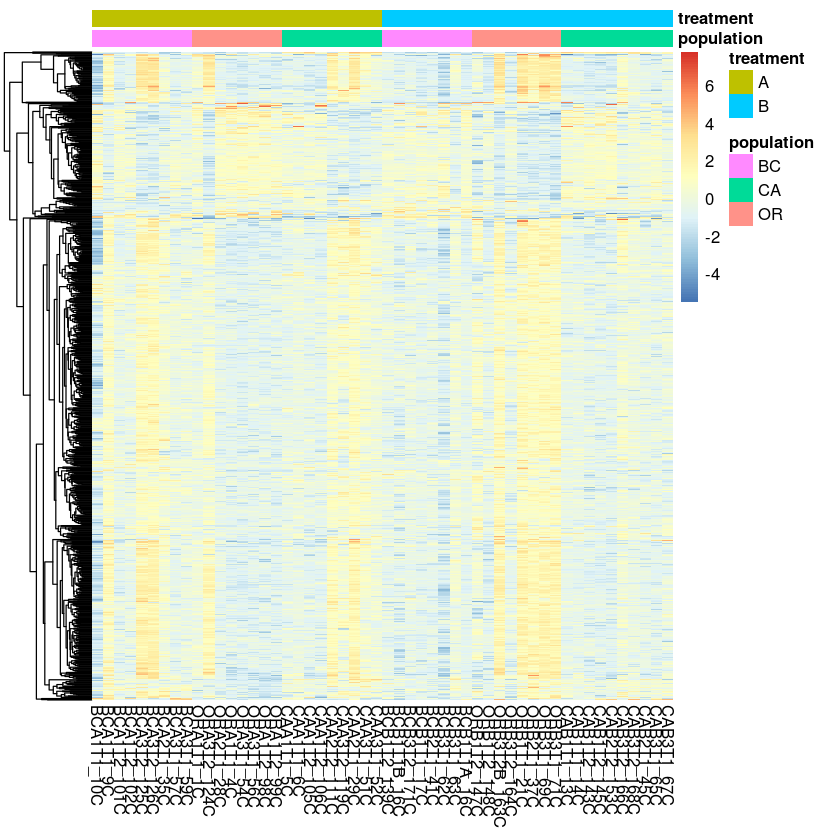

In [19]:
library("pheatmap")
matrix <- assay(vsd_C12)[ rownames(sig_lrt),]
matrix <- matrix - rowMeans(matrix)

annotation_data <- as.data.frame(colData(vsd_C12)[c("population","treatment")])
pheatmap(matrix, annotation_col=annotation_data, show_rownames = F,cluster_rows = T,cluster_cols = F)

## Ctenidia, controlling for population and time point
Use to identify species-wide genes that vary in response to treatment 

In [20]:
Cc.12 <- DESeqDataSetFromMatrix(countData = C, colData = C.con, design = ~ batch+ time_point + population + treatment)
Cc.12

class: DESeqDataSet 
dim: 174644 54 
metadata(1): version
assays(1): counts
rownames(174644): TRINITY_DN0_c0_g1 TRINITY_DN100001_c0_g1 ...
  TRINITY_DN99999_c0_g1 TRINITY_DN99_c0_g1
rowData names(0):
colnames(54): CAA1T1_5C CAB1T1_14C ... ORA1T2_98C ORA1T2_99C
colData names(5): time_point treatment population tissue batch

In [21]:
#Remove low count genes
keep <- rowSums(counts(Cc.12)) >= 12
Cc.12 <- Cc.12[keep,]
dim(Cc.12)
remove(keep)

[1] 107664     54

In [22]:
#group replicates
reps <- c(seq(1,14,1),6,seq(16,42,1),42,seq(44,54,1))
Cc.12 <- collapseReplicates(Cc.12,groupby = reps,renameCols = F)

In [23]:
Cc.12 <- DESeq(Cc.12)
resultsNames(Cc.12)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


[1] "Intercept"           "batch_318_vs_24"     "time_point_T2_vs_T1"
[4] "population_CA_vs_BC" "population_OR_vs_BC" "treatment_B_vs_A"

In [35]:
Cc.12

class: DESeqDataSet 
dim: 107664 52 
metadata(1): version
assays(3): counts mu cooks
rownames(107664): TRINITY_DN100030_c0_g1 TRINITY_DN100040_c0_g1 ...
  TRINITY_DN99968_c0_g1 TRINITY_DN99975_c0_g1
rowData names(37): baseMean baseVar ... deviance maxCooks
colnames(52): CAA1T1_5C CAB1T1_14C ... ORA1T2_98C ORA1T2_99C
colData names(6): time_point treatment ... batch sizeFactor

In [31]:
save(Cc.12,file = "cPop_C_12.deseq2")

### Genes that change in response to treatment

In [36]:
RM <- results(Cc.12, contrast=c("treatment","B","A"))
summary(RM)
sum(RM$padj < 0.1, na.rm=TRUE)
sig_C <- RM[which(RM$padj < 0.1 & !is.na(RM$padj)),]
#sig_C <- sig_C[which(abs(sig_C$log2FoldChange) > 1),]
dim(sig_C)


out of 107664 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 46, 0.043% 
LFC < 0 (down)   : 33, 0.031% 
outliers [1]     : 753, 0.7% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] 79

[1] 79  6

In [37]:
#up-regulated
sig_Cu <- sig_C[which(sig_C$log2FoldChange > 0),]
dim(sig_Cu)

[1] 46  6

In [38]:
#down-regulated
sig_Cn <- sig_C[which(sig_C$log2FoldChange < 0),]
dim(sig_Cn)

[1] 33  6

In [17]:
genes.in <- cbind(rep("treatment_cPop_C_T12_up",nrow(sig_C)),rownames(sig_C))
write.table(genes.in, "treatment_cPop_C_T12_up.genes",sep = "\t",quote = F,na = "NA",row.names = F,col.names = F)
genes.in <- cbind(rep("treatment_cPop_C_T12_down",nrow(sig_Cn)),rownames(sig_Cn))
write.table(genes.in, "treatment_cPop_C_T12_down.genes",sep = "\t",quote = F,na = "NA",row.names = F,col.names = F)

In [44]:
vsd_Cc12 <- vst(Cc.12, blind=FALSE)
vsd_Cc12 <- vsd_Cc12[,order_treat]

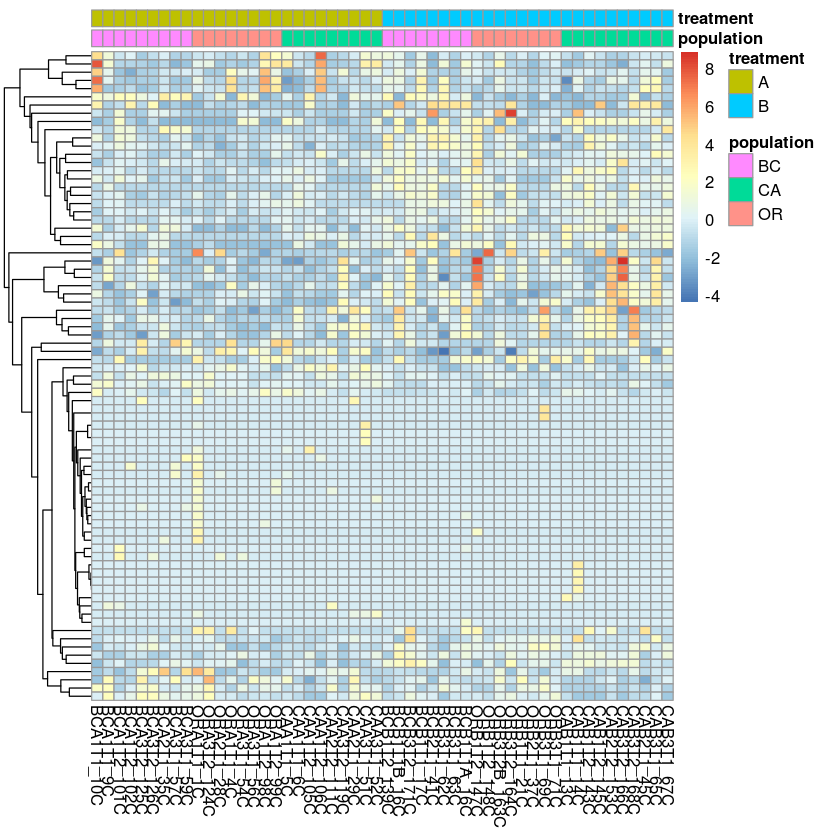

In [46]:
#topVarianceGenes <- order(rowVars(assay(vsd_Mc12)[rownames(sig),]), decreasing = T)
matrix <- assay(vsd_Cc12)[ rownames(sig_C),]
matrix <- matrix - rowMeans(matrix)

annotation_data <- as.data.frame(colData(vsd_Cc12)[c("population","treatment")])
pheatmap(matrix, annotation_col=annotation_data, show_rownames = F,cluster_rows = T,cluster_cols = F)

## Sample comparision visualization

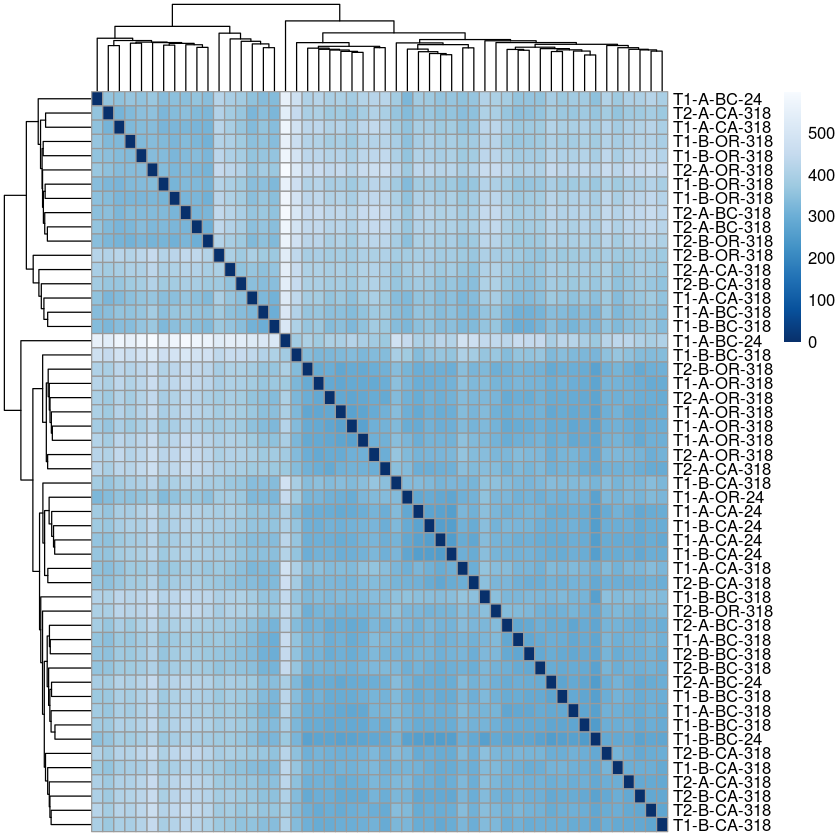

In [42]:
library("RColorBrewer")
sampleDists <- dist(t(assay(vsd_Cc12)))

sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd_Cc12$time_point,vsd_Cc12$treatment, vsd_Cc12$population,vsd_Cc12$batch, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

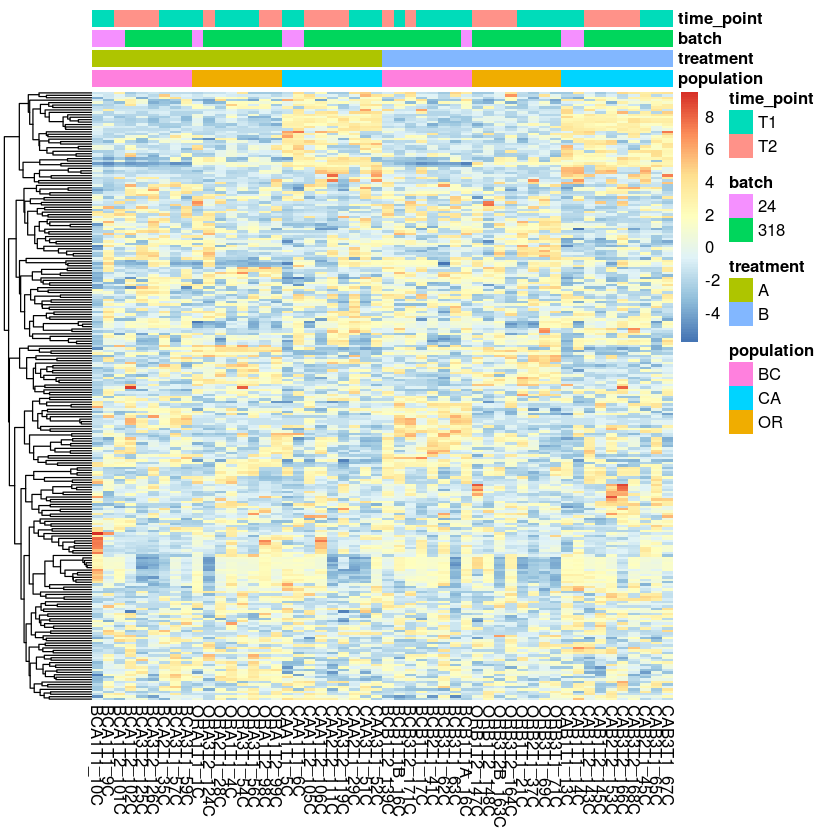

In [47]:
#Top 250 highest variance genes
topVarianceGenes <- head(order(rowVars(assay(vsd_Cc12)), decreasing = T),250)
matrix <- assay(vsd_Cc12)[ topVarianceGenes,]
matrix <- matrix - rowMeans(matrix)

annotation_data <- as.data.frame(colData(vsd_Cc12)[c("population","treatment","batch","time_point")])
pheatmap(matrix, annotation_col=annotation_data, show_rownames = F,cluster_rows = T,cluster_cols = F)

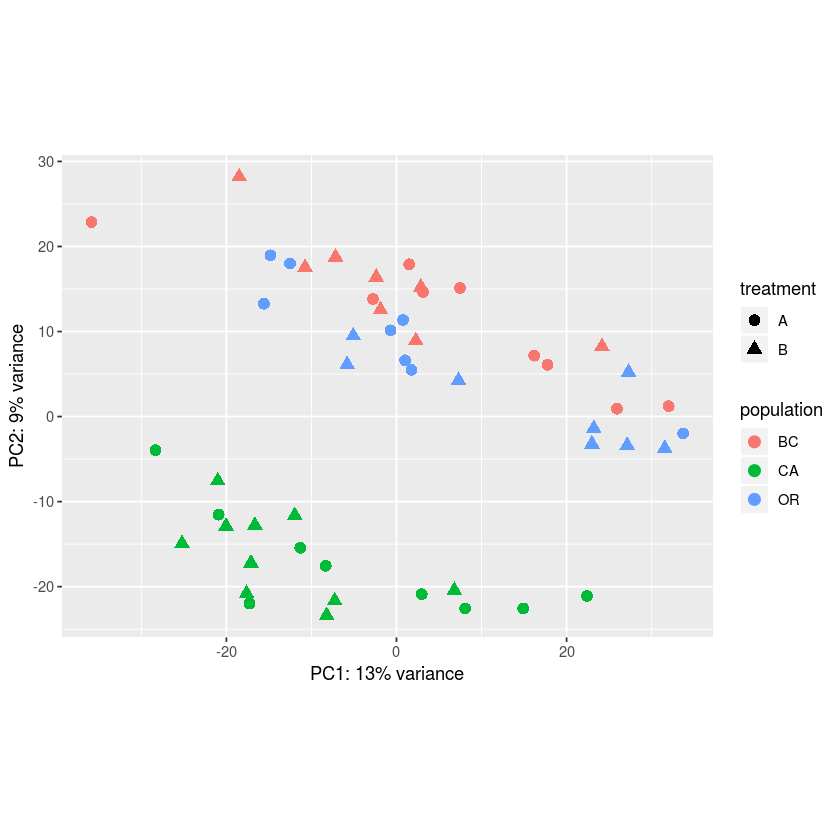

In [48]:
library("ggplot2")
pcaData <- plotPCA(vsd_Cc12, intgroup=c("treatment", "population","time_point","batch"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=population, shape=treatment)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()

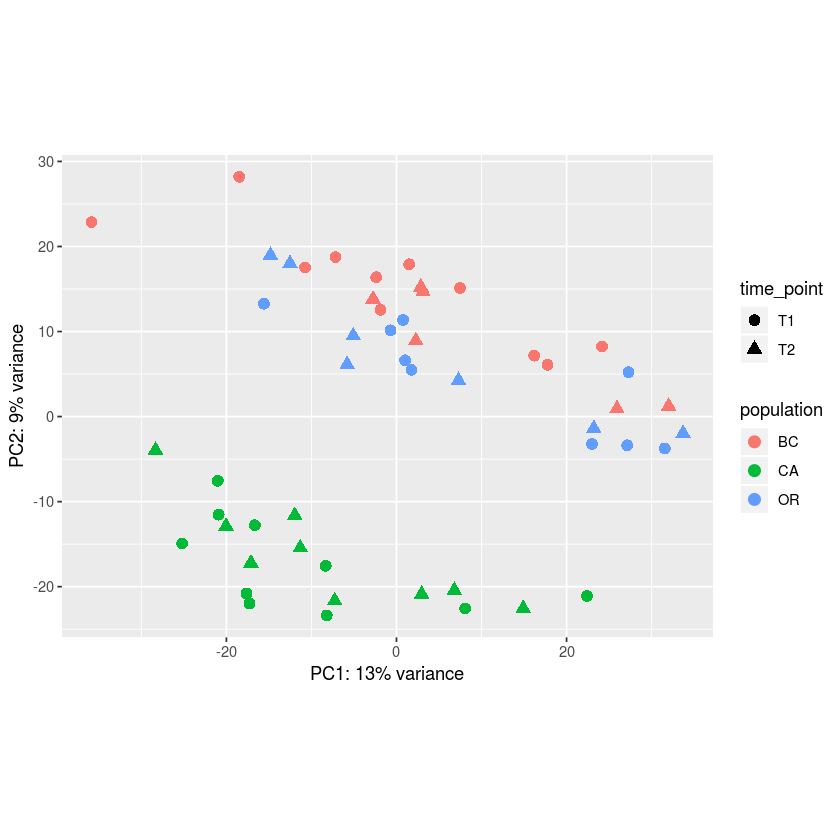

In [49]:
library("ggplot2")
pcaData <- plotPCA(vsd_Cc12, intgroup=c("treatment", "population","time_point","batch"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=population, shape=time_point)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()


# Mantle
## Mantle, with pop:treatment interaction

In [50]:
M <- cts[,grep("M$",colnames(cts))]
M.con <- filter(conditions,tissue == "M")
dim(M)
dim(M.con)

[1] 174644     26

[1] 26  5

In [51]:
M.12 <- DESeqDataSetFromMatrix(countData = M, colData = M.con, design = ~ batch+ time_point + population + treatment + population:treatment)
M.12

class: DESeqDataSet 
dim: 174644 26 
metadata(1): version
assays(1): counts
rownames(174644): TRINITY_DN0_c0_g1 TRINITY_DN100001_c0_g1 ...
  TRINITY_DN99999_c0_g1 TRINITY_DN99_c0_g1
rowData names(0):
colnames(26): ORA1T1_1M CAA1T1_6M ... ORA1T2_97M ORA1T2_98M
colData names(5): time_point treatment population tissue batch

In [52]:
keep <- rowSums(counts(M.12)) >= 12
M.12 <- M.12[keep,]
dim(M.12)
remove(keep)

[1] 83074    26

In [53]:
M.12 <- DESeq(M.12)
resultsNames(M.12)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


[1] "Intercept"               "batch_318_vs_24"        
[3] "time_point_T2_vs_T1"     "population_CA_vs_BC"    
[5] "population_OR_vs_BC"     "treatment_B_vs_A"       
[7] "populationCA.treatmentB" "populationOR.treatmentB"

In [55]:
save(M.12,file ="int_M_12.deseq2")

### Likelihood ratio test for pop:treatment interaction

In [56]:
lrt.M <- DESeq(M.12, test="LRT",reduced = ~batch+ time_point + population + treatment)

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [57]:
save(lrt.M,file = "lrt_M_12.deseq2")

In [58]:
lrt_R <- results(lrt.M, contrast= c("treatment","B","A"))
summary(lrt_R)
sum(lrt_R$padj < 0.05, na.rm=TRUE)
sig_lrt <- lrt_R[which(lrt_R$padj < 0.05 & !is.na(lrt_R$padj)),]
dim(sig_lrt)


out of 83074 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 21, 0.025% 
LFC < 0 (down)   : 18, 0.022% 
outliers [1]     : 365, 0.44% 
low counts [2]   : 45088, 54% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



[1] 20

[1] 20  6

In [59]:
order_treat_M <- c('BCA1T1_9M','BCA1T2_101M','BCA1T1_10M','BCA3T1_57M',
                   'ORA1T1_1M','ORA1T1_4M','ORA3T1_54M','ORA1T2_97M','ORA1T2_98M',
                   'CAA1T1_6M','CAA1T2_106M','CAA1T1_5M',
                   'BCB1T1_16M','BCB1T2_139M','BCB1T2_142M','BCB1T1_17M','BCB3T1_62M',
                   'ORB1T2_147M','ORB3T2_164M','ORB1T1_21M','ORB1T1_24M',
                   'CAB1T1_14M','CAB1T2_143M','CAB1T2_145M','CAB3T2_166M','CAB3T1_65M')

In [60]:
vsd_M12 <- vst(M.12, blind=FALSE)
vsd_M12 <- vsd_M12[,order_treat_M]

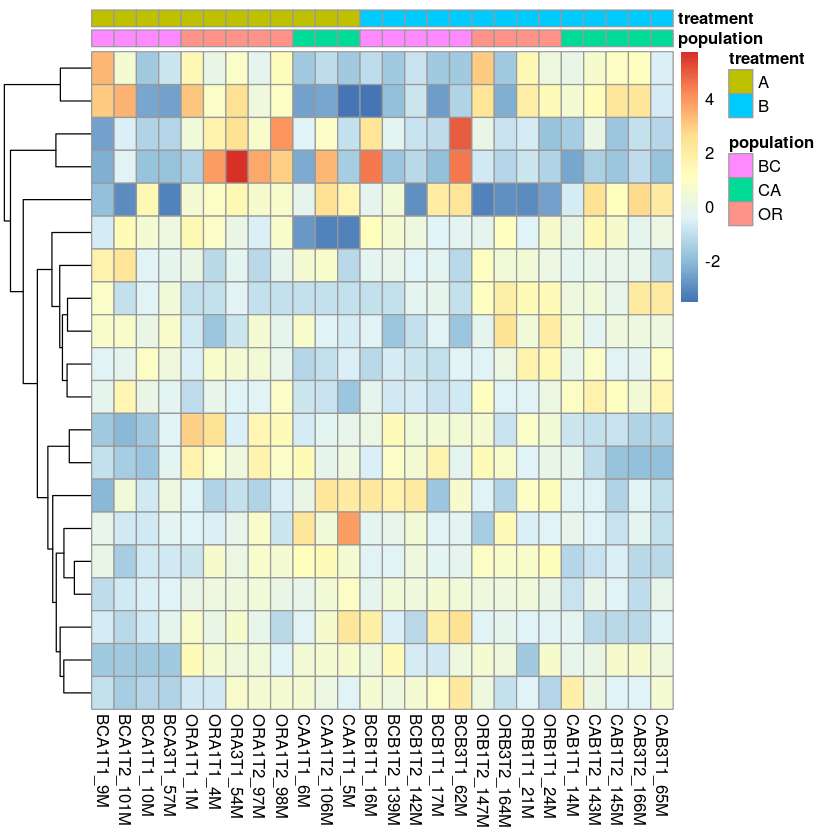

In [61]:
library("pheatmap")
matrix <- assay(vsd_M12)[ rownames(sig_lrt),]
matrix <- matrix - rowMeans(matrix)

annotation_data <- as.data.frame(colData(vsd_M12)[c("population","treatment")])
pheatmap(matrix, annotation_col=annotation_data, show_rownames = F,cluster_rows = T,cluster_cols = F)

## Sample comparision

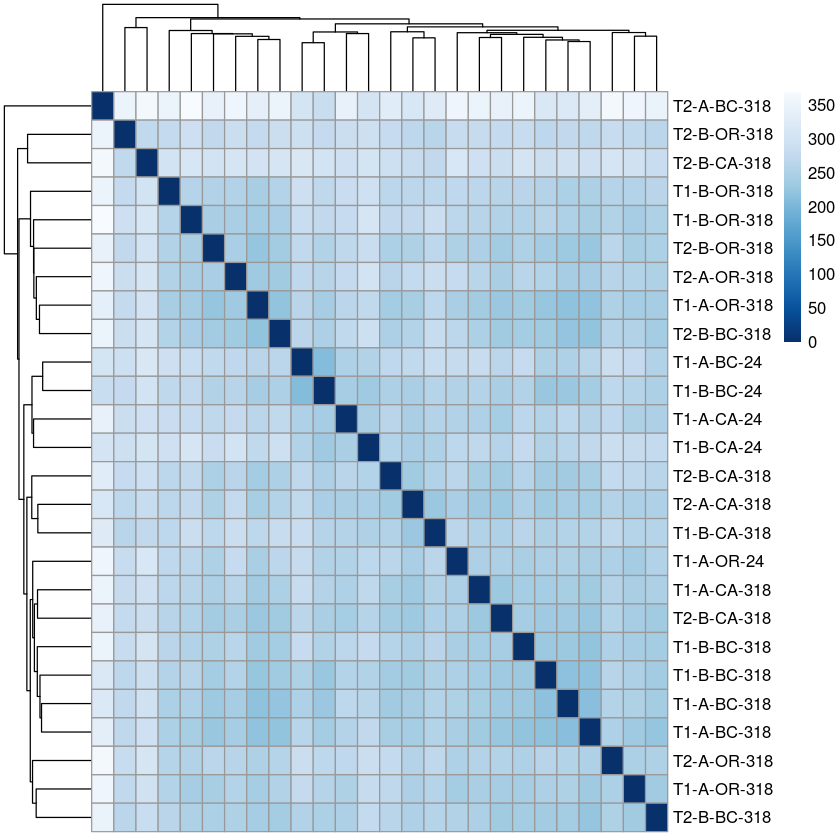

In [62]:
library("RColorBrewer")
sampleDists <- dist(t(assay(vsd_M12)))

sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd_M12$time_point,vsd_M12$treatment, vsd_M12$population,vsd_M12$batch, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

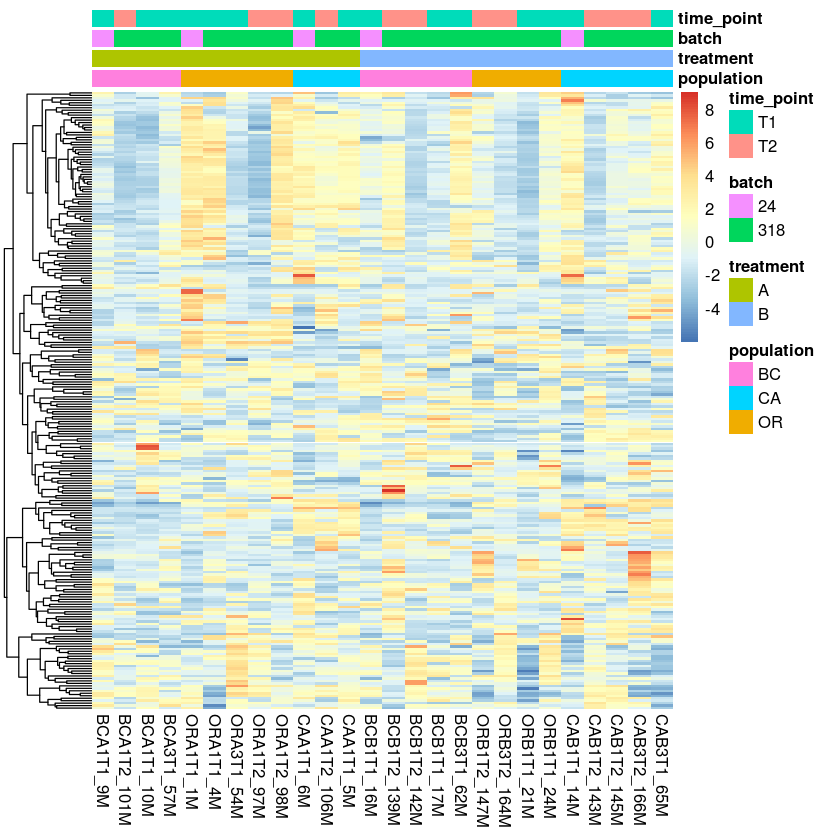

In [63]:
#Top 250 highest variance genes
topVarianceGenes <- head(order(rowVars(assay(vsd_M12)), decreasing = T),250)
matrix <- assay(vsd_M12)[ topVarianceGenes,]
matrix <- matrix - rowMeans(matrix)

annotation_data <- as.data.frame(colData(vsd_M12)[c("population","treatment","batch","time_point")])
pheatmap(matrix, annotation_col=annotation_data, show_rownames = F,cluster_rows = T,cluster_cols = F)

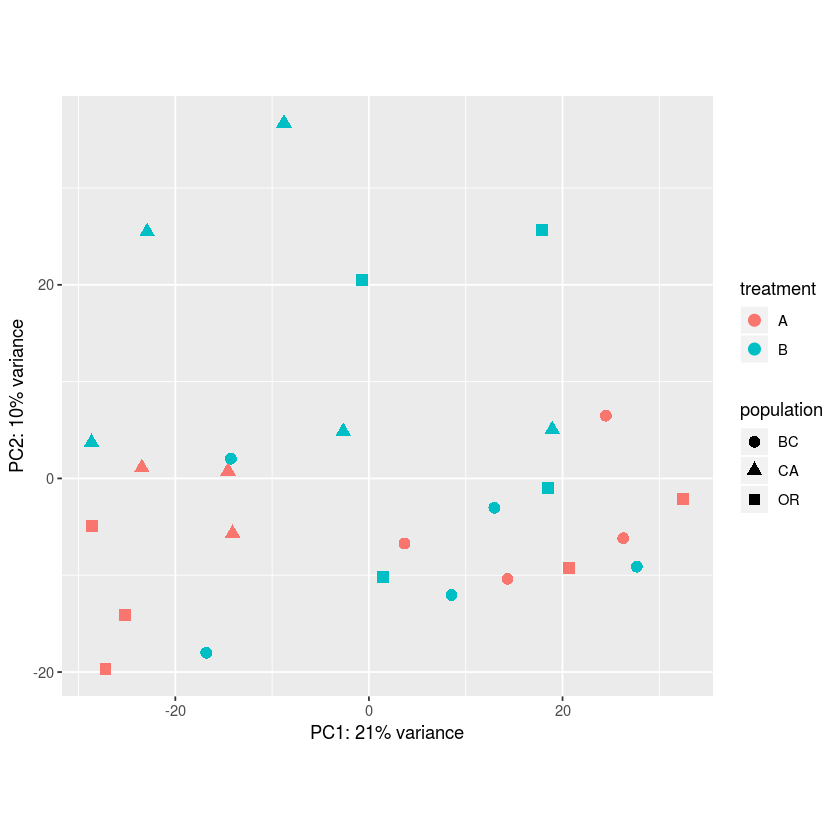

In [64]:
library("ggplot2")
pcaData <- plotPCA(vsd_M12, intgroup=c("treatment", "population","time_point","batch"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=treatment, shape=population)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()

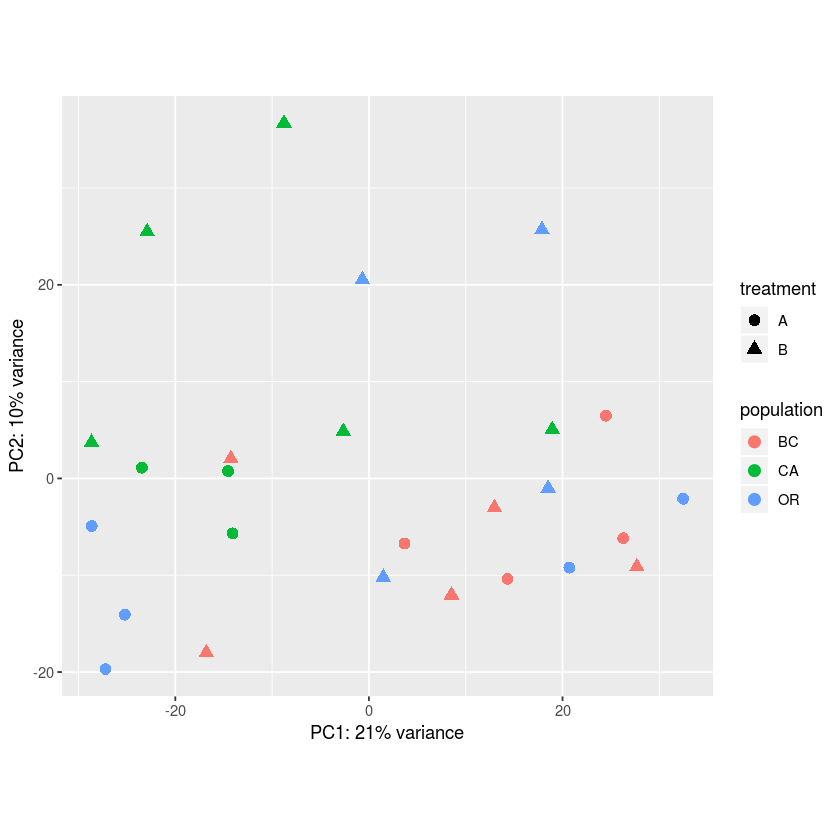

In [65]:
library("ggplot2")
ggplot(pcaData, aes(PC1, PC2, color=population, shape=treatment)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()

# Comparing all samples

In [71]:
T12 <- DESeqDataSetFromMatrix(countData = cts, colData = conditions,
                              design = ~ batch+ population + tissue + time_point + treatment)
T12

class: DESeqDataSet 
dim: 174644 80 
metadata(1): version
assays(1): counts
rownames(174644): TRINITY_DN0_c0_g1 TRINITY_DN100001_c0_g1 ...
  TRINITY_DN99999_c0_g1 TRINITY_DN99_c0_g1
rowData names(0):
colnames(80): CAA1T1_5C ORA1T1_1M ... ORA1T2_98M ORA1T2_99C
colData names(5): time_point treatment population tissue batch

In [72]:
keep <- rowSums(counts(T12)) >= 12
T12 <- T12[keep,]
dim(T12)
remove(keep)

[1] 117296     80

In [73]:
reps <- c(seq(1,22,1),8,seq(24,61,1),61,seq(63,80,1))
T12 <- collapseReplicates(T12,groupby = reps,renameCols = F)

In [74]:
T12 <- DESeq(T12)
resultsNames(T12)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


[1] "Intercept"           "batch_318_vs_24"     "population_CA_vs_BC"
[4] "population_OR_vs_BC" "tissue_M_vs_C"       "time_point_T2_vs_T1"
[7] "treatment_B_vs_A"

In [75]:
vsd_T12 <- vst(T12, blind=FALSE)


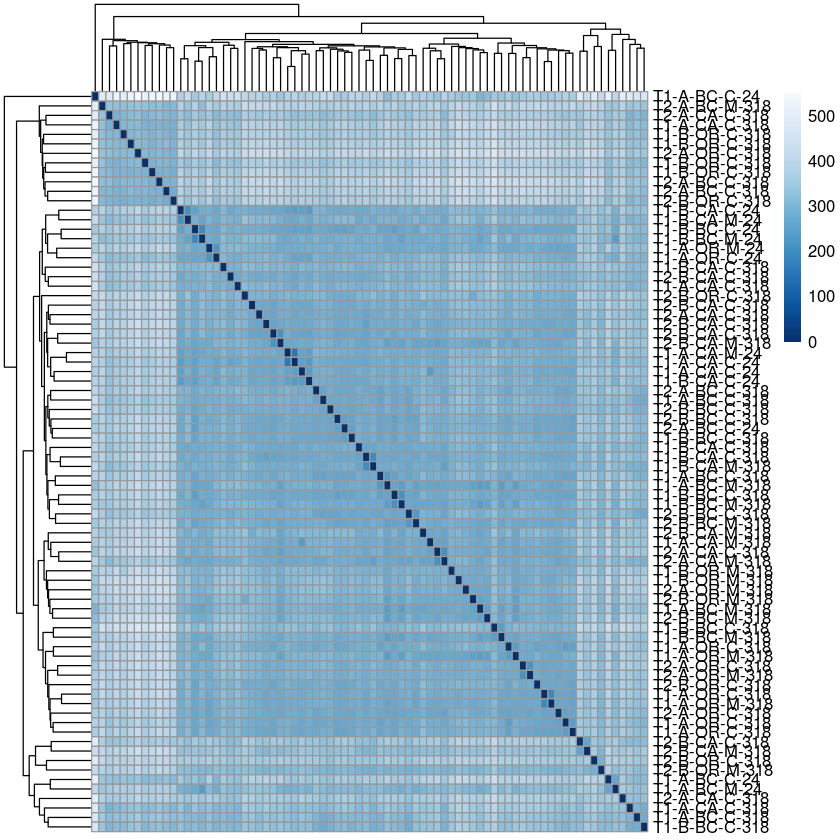

In [76]:
library("RColorBrewer")
sampleDists <- dist(t(assay(vsd_T12)))

sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd_T12$time_point,vsd_T12$treatment, vsd_T12$population,vsd_T12$tissue,vsd_T12$batch, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

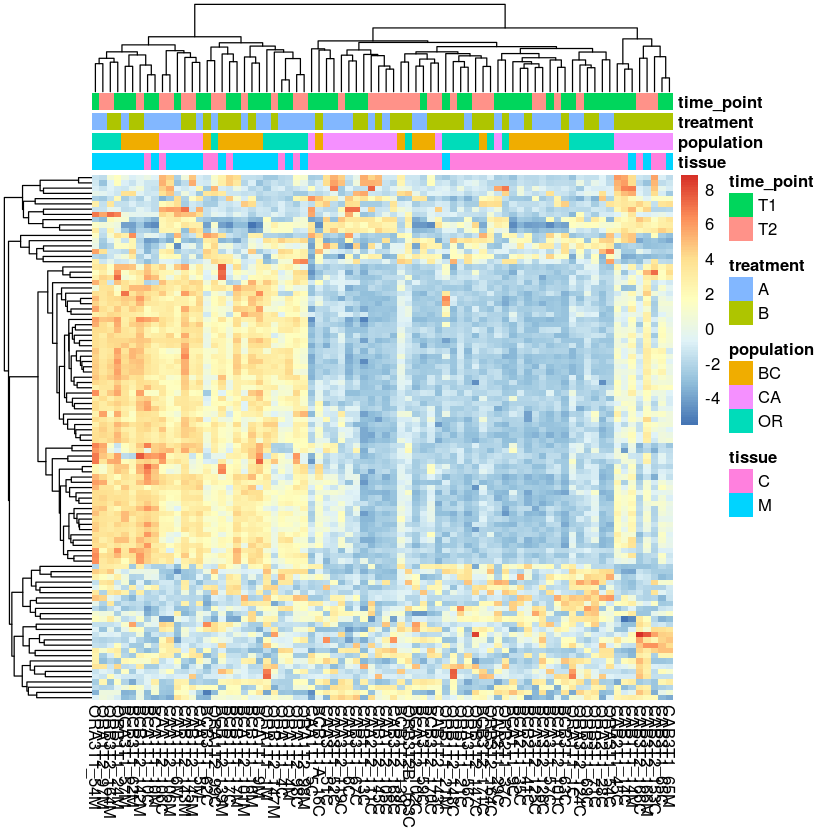

In [77]:
topVarianceGenes <- head(order(rowVars(assay(vsd_T12)), decreasing = T),100)
matrix <- assay(vsd_T12)[ topVarianceGenes,]
matrix <- matrix - rowMeans(matrix)

annotation_data <- as.data.frame(colData(vsd_T12)[c("tissue","population","treatment","time_point")])
pheatmap(matrix, annotation_col=annotation_data, show_rownames = F)

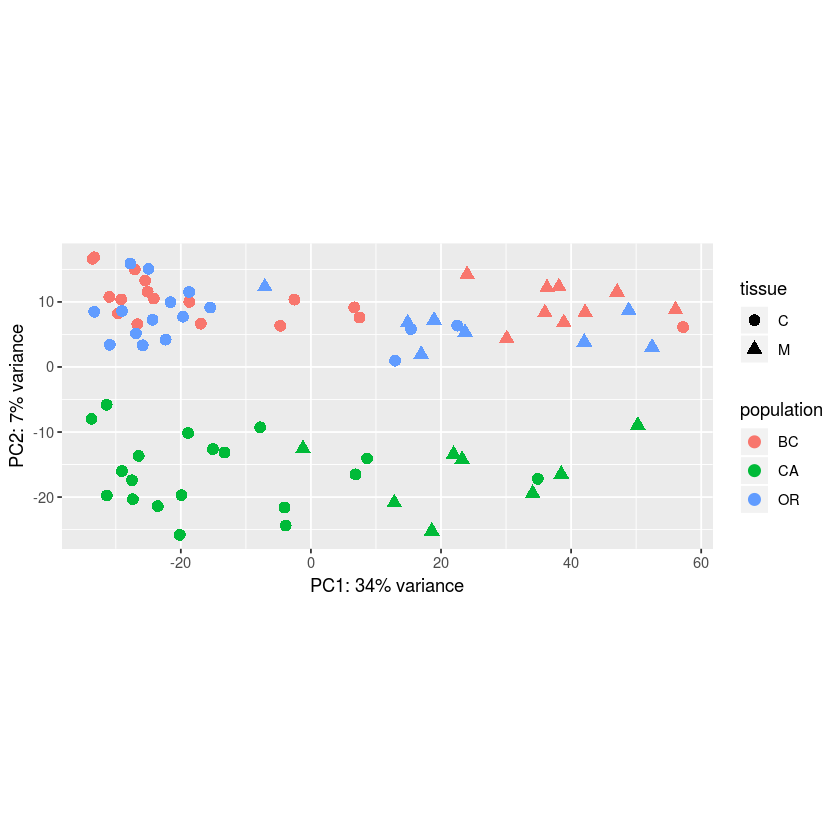

In [78]:
library("ggplot2")
pcaData <- plotPCA(vsd_T12, intgroup=c("treatment", "population","tissue","time_point"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=population, shape=tissue)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()